# Tutorial: Carbon Property Simulations with GPUMD

This tutorial demonstrates step-by-step how to use the GPUMD package to compute and visualize key properties of carbon materials, including lattice constant, elastic constants, quenching, diffusion coefficient, density of states (DOS), thermal conductivity, and uniaxial tension. Each section explains the purpose, required files, calculation procedure, and how to visualize the results.

## Introduction

The examples in this notebook reproduce results from the JCP 2022 paper using GPUMD. For each property, you will:
- Prepare input files
- Run the calculation
- Visualize the output

Please refer to the [GPUMD Documentation](https://gpumd.org/) and the [example folder](https://github.com/zhang-js25/GPUMD-Tutorials/tree/main/examples/01_Carbon_examples_for_JCP_2022_paper) for input/output file details.

## Dependencies & Environment Setup

You will need:
- GPUMD (download and compile from https://github.com/brucefan1983/GPUMD)
- Python 3, NumPy, Matplotlib, pandas

Install Python libraries with:
```bash
pip install numpy matplotlib pandas
```

GPUMD jobs are run from the command line. Results are analyzed here.

## A. Lattice Constant
**Goal:** Find the equilibrium lattice constant for carbon.

**Procedure:**
- Prepare input files (`POSCAR`, potential)
- Run energy minimization with GPUMD
- Output: energy vs lattice constant


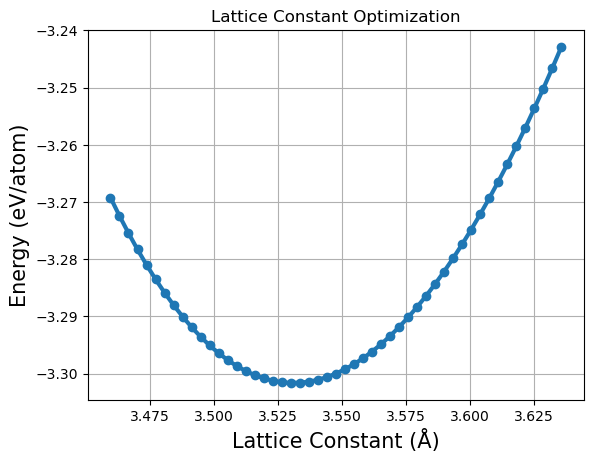

In [3]:
# Lattice Constant Analysis
import numpy as np
import matplotlib.pyplot as plt

# Parameters from the original script
a = 3.53  # lattice constant scaling factor
N = 8000  # number of atoms

# Load cohesive energy data
data = np.loadtxt('A_lattice_constant/cohesive.out')

# Plot energy per atom vs lattice constant
plt.plot(data[:,0]*a, data[:,1]/N, marker='o', linewidth=3)
plt.xlabel('Lattice Constant (Å)', fontsize=15)
plt.ylabel('Energy (eV/atom)', fontsize=15)
plt.title('Lattice Constant Optimization')
plt.grid(True)
plt.show()

## B. Quenching
**Goal:** Simulate rapid cooling and monitor temperature evolution.

**Procedure:**
- Start from high-T configuration
- Run quenching simulation in GPUMD
- Output: temperature vs time

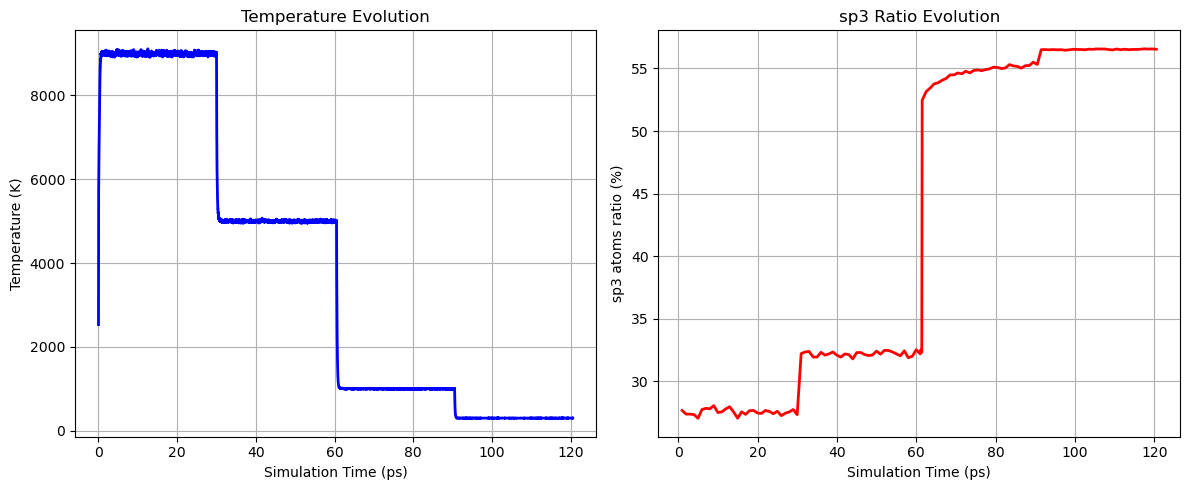

In [6]:
# Quenching Analysis: Temperature and sp3 Ratio
import numpy as np
import matplotlib.pyplot as plt

# Load temperature evolution data
temp_data = np.loadtxt('C_Quenching/Quench_Thermo_a.txt')
sp3_data = np.loadtxt('C_Quenching/Quench_Thermo_b.txt')

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(temp_data[:,0], temp_data[:,1], color='blue', lw=2)
axs[0].set_xlabel('Simulation Time (ps)')
axs[0].set_ylabel('Temperature (K)')
axs[0].set_title('Temperature Evolution')
axs[0].grid(True)

axs[1].plot(sp3_data[:,0], sp3_data[:,1]*100, color='red', lw=2)
axs[1].set_xlabel('Simulation Time (ps)')
axs[1].set_ylabel('sp3 atoms ratio (%)')
axs[1].set_title('sp3 Ratio Evolution')
axs[1].grid(True)

plt.tight_layout()
plt.show()

## C. Diffusion Coefficient
**Goal:** Measure atomic diffusion via mean square displacement (MSD).

**Procedure:**
- Run GPUMD simulation with mobile atoms
- Output: MSD vs time

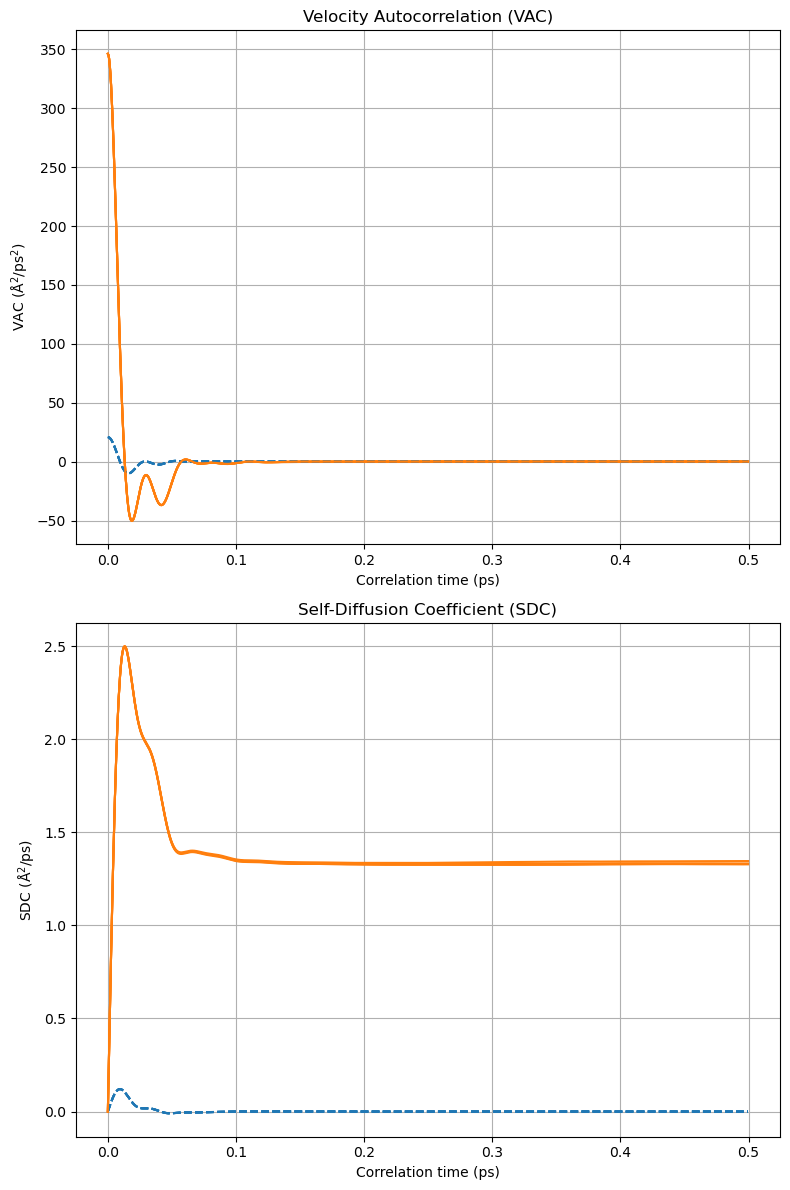

In [7]:
# Diffusion Coefficient Analysis: VAC and SDC
import numpy as np
import matplotlib.pyplot as plt

# Load VAC and SDC data for 300K and 5000K
time = np.loadtxt('D_Diffusion_Coefficient/300K/sdc.out')[:, 0][:1000]
vac_300 = np.mean(np.loadtxt('D_Diffusion_Coefficient/300K/sdc.out')[:, 1:4], axis=1).reshape((5, 1000)).T
vac_5000 = np.mean(np.loadtxt('D_Diffusion_Coefficient/5000K/sdc.out')[:, 1:4], axis=1).reshape((5, 1000)).T
sdc_300 = np.mean(np.loadtxt('D_Diffusion_Coefficient/300K/sdc.out')[:, 4:], axis=1).reshape((5, 1000)).T
sdc_5000 = np.mean(np.loadtxt('D_Diffusion_Coefficient/5000K/sdc.out')[:, 4:], axis=1).reshape((5, 1000)).T

fig, axs = plt.subplots(2, 1, figsize=(8, 12))
for i in range(5):
    axs[0].plot(time, vac_300[:,i], ls='--', lw=1.5, color='C0' if i==0 else 'C0')
    axs[0].plot(time, vac_5000[:,i], ls='-', lw=1.5, color='C1' if i==0 else 'C1')
axs[0].set_xlabel('Correlation time (ps)')
axs[0].set_ylabel('VAC ($\mathrm{\AA^2/ps^2}$)')
axs[0].set_title('Velocity Autocorrelation (VAC)')
axs[0].grid(True)

for i in range(5):
    axs[1].plot(time, sdc_300[:,i], ls='--', lw=1.5, color='C0' if i==0 else 'C0')
    axs[1].plot(time, sdc_5000[:,i], ls='-', lw=1.5, color='C1' if i==0 else 'C1')
axs[1].set_xlabel('Correlation time (ps)')
axs[1].set_ylabel('SDC ($\mathrm{\AA^2/ps}$)')
axs[1].set_title('Self-Diffusion Coefficient (SDC)')
axs[1].grid(True)

plt.tight_layout()
plt.show()

## D. Density of States (DOS)
**Goal:** Calculate vibrational density of states.

**Procedure:**
- Collect velocity autocorrelation data in GPUMD
- Post-process for DOS
- Output: DOS vs frequency

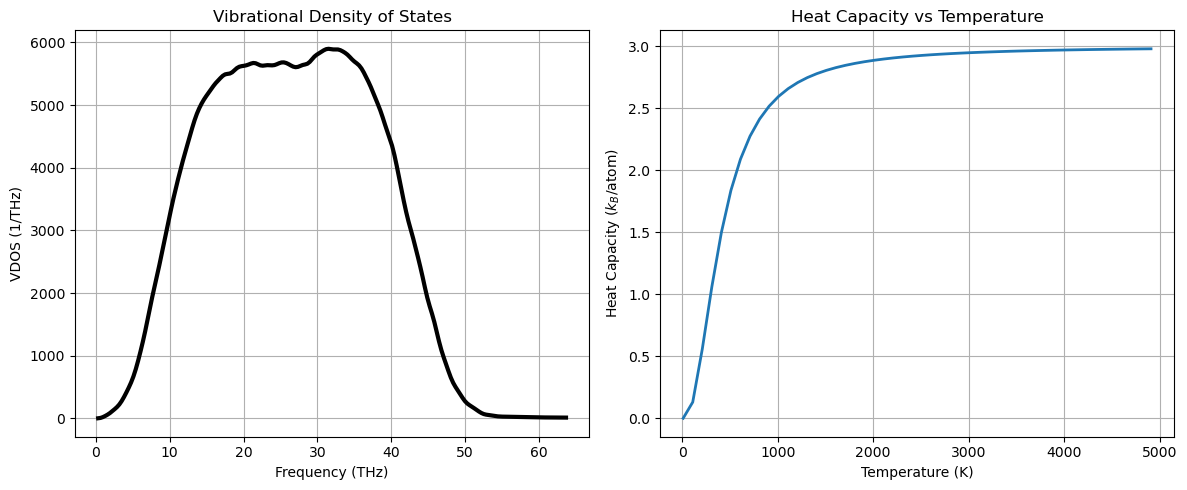

In [11]:
# DOS and Heat Capacity Analysis
import numpy as np
import matplotlib.pyplot as plt

# Load DOS and heat capacity results
dos_data = np.loadtxt('E_DOS/DOS_results.txt')
hc_data = np.loadtxt('E_DOS/Heat_Capacity_results.txt')

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(dos_data[:,0], dos_data[:,1], color='k', linewidth=3)
axs[0].set_xlabel('Frequency (THz)')
axs[0].set_ylabel('VDOS (1/THz)')
axs[0].set_title('Vibrational Density of States')
axs[0].grid(True)

axs[1].plot(hc_data[:,0], hc_data[:,1], lw=2)
axs[1].set_xlabel('Temperature (K)')
axs[1].set_ylabel('Heat Capacity ($k_B$/atom)')
axs[1].set_title('Heat Capacity vs Temperature')
axs[1].grid(True)

plt.tight_layout()
plt.show()

## E. Thermal Conductivity
**Goal:** Compute thermal conductivity via NEMD or Green-Kubo.

**Procedure:**
- Set up heat flow simulation in GPUMD
- Output: thermal conductivity vs time

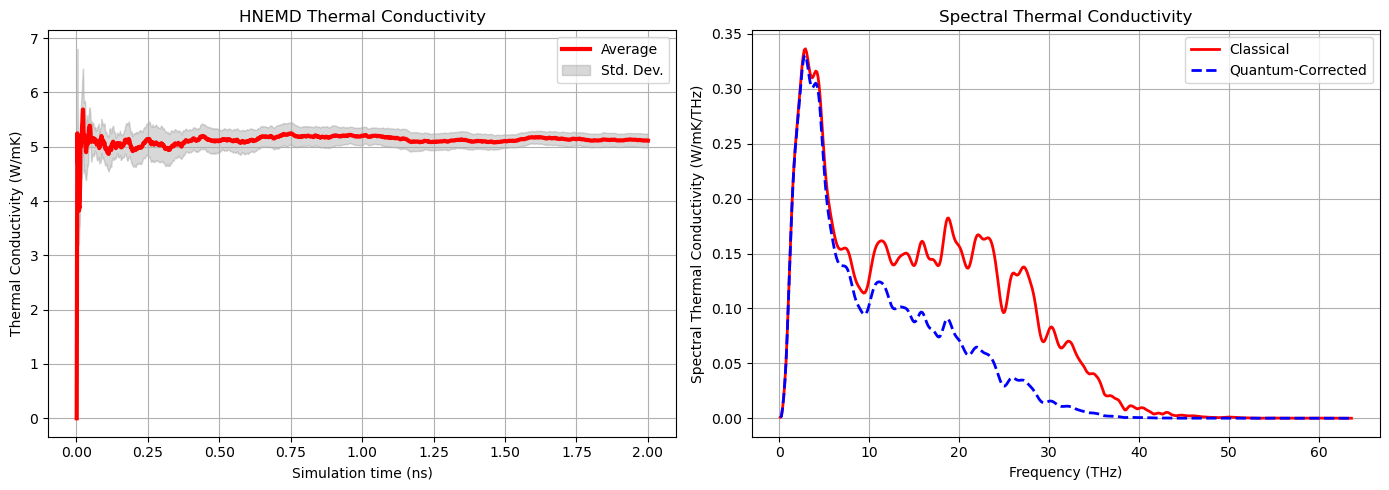

In [9]:
# Thermal Conductivity Analysis: HNEMD and SHC
import numpy as np
import matplotlib.pyplot as plt

# Load HNEMD and SHC results
hnemd_data = np.loadtxt('F_Thermal_Conductivity/hnemd_results.txt')
shc_data = np.loadtxt('F_Thermal_Conductivity/shc_results.txt')

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].plot(hnemd_data[:,0], hnemd_data[:,1], color='red', linewidth=3, label='Average')
axs[0].fill_between(hnemd_data[:,0], hnemd_data[:,1]-hnemd_data[:,2], hnemd_data[:,1]+hnemd_data[:,2], color='gray', alpha=0.3, label='Std. Dev.')
axs[0].set_xlabel('Simulation time (ns)')
axs[0].set_ylabel('Thermal Conductivity (W/mK)')
axs[0].set_title('HNEMD Thermal Conductivity')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(shc_data[:,0], shc_data[:,1], linewidth=2, color='red', label='Classical')
axs[1].plot(shc_data[:,0], shc_data[:,2], linewidth=2, linestyle='--', color='blue', label='Quantum-Corrected')
axs[1].set_xlabel('Frequency (THz)')
axs[1].set_ylabel('Spectral Thermal Conductivity (W/mK/THz)')
axs[1].set_title('Spectral Thermal Conductivity')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

## Notes on Model Training

If you wish to train a new potential model using GPUMD (such as NEP or other ML-based potentials), refer to the GPUMD documentation and use commands like:
```bash
gpumd_train < training_input.in > training_output.out
```
Replace filenames as needed. Training scripts and details depend on your chosen potential type.

## References
- GPUMD Documentation: https://gpumd.org/
- JCP 2022 Paper: Carbon Simulations
- Example scripts and files: [GitHub Repository](https://github.com/zhang-js25/GPUMD-Tutorials/tree/main/examples/01_Carbon_examples_for_JCP_2022_paper)

## Author
Dr. Ji-Suo Zhang

**Contact:** zhang-js25@github.com